# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Visualizando a estrutura da base de dados
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
# Gerando DataFrame com apenas as colunas com dados numéricos
numerics = ['int64', 'float64']
sinasc_numeric = sinasc_raw.select_dtypes(include=numerics)
sinasc_numeric.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,NaN,0.0,0.0,110001,...,1,1,1,0,5,1,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,2,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,513205.0,2.0,0.0,110001,...,1,1,7,1,5,3,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,231205.0,0.0,0.0,110037,...,1,1,2,0,4,4,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,5,-11.93554,-61.99982,338.0,7067.025


In [5]:
# Visualizando a estrutura da base de dados
sinasc_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      27028 non-null  int64  
 1   CODESTAB    26913 non-null  float64
 2   CODMUNNASC  27028 non-null  int64  
 3   LOCNASC     27028 non-null  int64  
 4   IDADEMAE    27028 non-null  int64  
 5   ESTCIVMAE   26711 non-null  float64
 6   CODOCUPMAE  24121 non-null  float64
 7   QTDFILVIVO  25455 non-null  float64
 8   QTDFILMORT  24930 non-null  float64
 9   CODMUNRES   27028 non-null  int64  
 10  CONSULTAS   27028 non-null  int64  
 11  HORANASC    27007 non-null  float64
 12  APGAR1      26932 non-null  float64
 13  APGAR5      26925 non-null  float64
 14  PESO        27028 non-null  int64  
 15  IDANOMAL    26437 non-null  float64
 16  NUMEROLOTE  27028 non-null  int64  
 17  DIFDATA     27028 non-null  int64  
 18  DTRECORIGA  0 non-null      float64
 19  NATURALMAE  26730 non-nul

In [6]:
# Visualizando as variáveis numéricas escolhidas
colunas = ['QTDFILVIVO', 'SEMAGESTAC']
sinasc_numeric[colunas].head()

,QTDFILVIVO,SEMAGESTAC
0,0.0,39.0
1,1.0,38.0
2,2.0,40.0
3,0.0,38.0
4,1.0,38.0


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
# Definindo os valores máximos e mínimos para a criação das faixas
maximo = sinasc_raw['munResLat'].apply('max')
minimo = sinasc_raw['munResLat'].apply('min')

In [8]:
# Gerando DataFrame para o item 1 da tarefa 2
sinasc_1 = sinasc_raw[['munResLat','QTDFILVIVO','SEMAGESTAC']].copy()

In [9]:
# Realizando o item 1 da tarefa 2
latitude = pd.cut(sinasc_1['munResLat'], [minimo, -10.5, maximo])
sinasc_1.pivot_table(['QTDFILVIVO','SEMAGESTAC'], latitude,
                     aggfunc={'QTDFILVIVO':[('Soma','sum'),('Media','mean'),('Minimo','min'), ('Maximo','max')
                                            ,('Mediana', 'median'), ('Desvio_Padrao','std'), ('Variancia', 'var')], 
                              'SEMAGESTAC': [('Soma','sum'),('Media','mean'),('Minimo','min'), ('Maximo','max')
                                            ,('Mediana', 'median'), ('Desvio_Padrao','std'), ('Variancia', 'var')]})               

QTDFILVIVO                                           \
                Desvio_Padrao Maximo     Media Mediana Minimo     Soma   
munResLat                                                                
(-13.5, -10.5]       1.139172   30.0  0.981373     1.0    0.0  12539.0   
(-10.5, -8.769]      1.198613   12.0  1.129317     1.0    0.0  14226.0   

                             SEMAGESTAC                                   \
                Variancia Desvio_Padrao Maximo      Media Mediana Minimo   
munResLat                                                                  
(-13.5, -10.5]   1.297712      2.015721   45.0  38.543080    39.0   19.0   
(-10.5, -8.769]  1.436674      2.020722   45.0  38.588302    39.0   21.0   

                                     
                     Soma Variancia  
munResLat                            
(-13.5, -10.5]   479553.0  4.063131  
(-10.5, -8.769]  511951.0  4.083319

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
# Definindo os valores máximos e mínimos para a criação das faixas
maximo = sinasc_raw['munResArea'].apply('max')
minimo = sinasc_raw['munResArea'].apply('min')

In [11]:
# Gerando DataFrame para o item 2 da tarefa 2
sinasc_2 = sinasc_raw[['munResArea','QTDFILVIVO','SEMAGESTAC']].copy()

In [12]:
# Realizando o item 2 da tarefa 2
area = pd.cut(sinasc_2['munResArea'], [minimo, 3000, maximo])
sinasc_2.pivot_table(['QTDFILVIVO','SEMAGESTAC'], area,
                     aggfunc={'QTDFILVIVO':[('Soma','sum'),('Media','mean'),('Minimo','min'), ('Maximo','max')
                                            ,('Mediana', 'median'), ('Desvio_Padrao','std'), ('Variancia', 'var')], 
                              'SEMAGESTAC': [('Soma','sum'),('Media','mean'),('Minimo','min'), ('Maximo','max')
                                            ,('Mediana', 'median'), ('Desvio_Padrao','std'), ('Variancia', 'var')]})               

QTDFILVIVO                                           \
                    Desvio_Padrao Maximo     Media Mediana Minimo     Soma   
munResArea                                                                   
(459.978, 3000.0]        1.076172   30.0  0.925098     1.0    0.0   4718.0   
(3000.0, 34096.394]      1.191750   14.0  1.086890     1.0    0.0  22053.0   

                                 SEMAGESTAC                                   \
                    Variancia Desvio_Padrao Maximo      Media Mediana Minimo   
munResArea                                                                     
(459.978, 3000.0]    1.158146      1.875715   45.0  38.469637    39.0   21.0   
(3000.0, 34096.394]  1.420268      2.049838   45.0  38.591547    39.0   19.0   

                                         
                         Soma Variancia  
munResArea                               
(459.978, 3000.0]    195118.0  3.518305  
(3000.0, 34096.394]  797147.0  4.201834

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [13]:
# Gerando DataFrame para o item 3 da tarefa 2
sinasc_3 = sinasc_raw[['munResAlt','QTDFILVIVO','SEMAGESTAC']].copy()

In [14]:
# Realizando o item 3 da tarefa 2
Alt = pd.qcut(sinasc_3['munResAlt'], 2)
sinasc_3.groupby(Alt).agg({'QTDFILVIVO':[('Soma','sum'),('Media','mean'),('Minimo','min'), ('Maximo','max')
                                            ,('Mediana', 'median'), ('Desvio_Padrao','std'), ('Variancia', 'var')], 
                              'SEMAGESTAC': [('Soma','sum'),('Media','mean'),('Minimo','min'), ('Maximo','max')
                                            ,('Mediana', 'median'), ('Desvio_Padrao','std'), ('Variancia', 'var')]})

QTDFILVIVO                                                \
                      Soma     Media Minimo Maximo Mediana Desvio_Padrao   
munResAlt                                                                  
(84.999, 153.0]    14406.0  1.182079    0.0   14.0     1.0      1.268260   
(153.0, 595.0]     12420.0  0.936157    0.0   30.0     1.0      1.060187   

                          SEMAGESTAC                                   \
                Variancia       Soma      Media Minimo Maximo Mediana   
munResAlt                                                               
(84.999, 153.0]  1.608482   493526.0  38.568771   21.0   45.0    39.0   
(153.0, 595.0]   1.123996   501090.0  38.566151   19.0   45.0    39.0   

                                         
                Desvio_Padrao Variancia  
munResAlt                                
(84.999, 153.0]      2.093561  4.383000  
(153.0, 595.0]       1.938267  3.756881

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [15]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [16]:
sinasc_4 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'DTNASC','munResNome']].set_index('munResNome')
sinasc_4.head()

,ESCMAE,IDADEMAE,DTNASC
munResNome,,,
Alta Floresta D'Oeste,8 a 11 anos,19,2019-02-19
Alta Floresta D'Oeste,8 a 11 anos,29,2019-02-21
Alta Floresta D'Oeste,8 a 11 anos,37,2019-02-25
Alto Alegre dos Parecis,12 anos ou mais,30,2019-03-20
Alta Floresta D'Oeste,8 a 11 anos,30,2019-03-23


In [17]:
sinasc_4.groupby([imediatas,'DTNASC'])['IDADEMAE'].mean().to_frame()

IDADEMAE
munResNome DTNASC               
Ariquemes  2019-01-01  23.200000
           2019-01-02  26.166667
           2019-01-03  24.142857
           2019-01-04  24.666667
           2019-01-05  22.888889
...                          ...
Vilhena    2019-12-27  27.000000
           2019-12-28  22.666667
           2019-12-29  24.250000
           2019-12-30  26.600000
           2019-12-31  23.857143

[2181 rows x 1 columns]

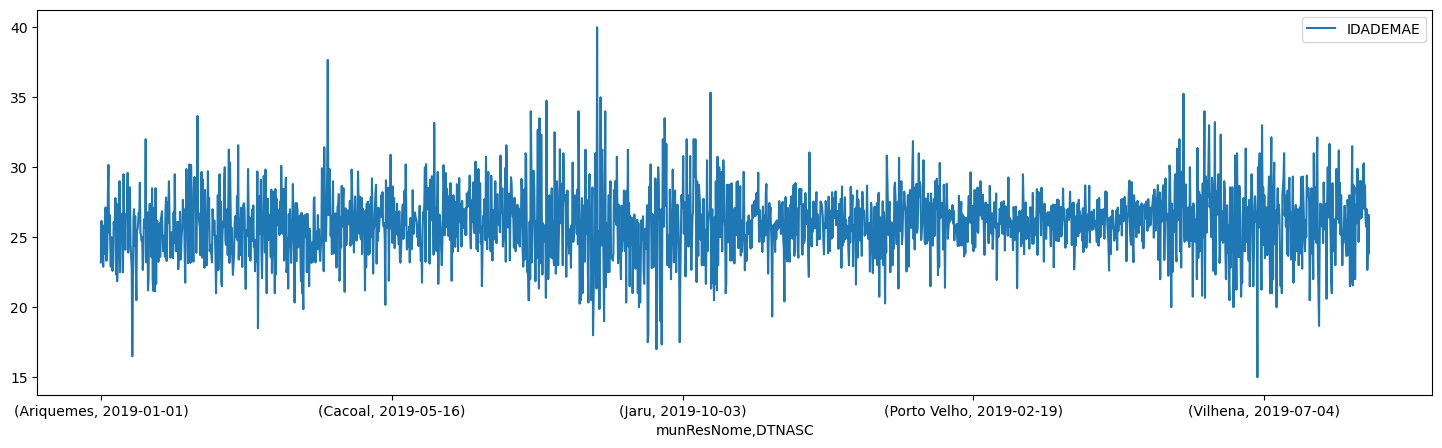

In [18]:
# Plotando no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
sinasc_4.pivot_table(values = 'IDADEMAE',index = [imediatas,'DTNASC'], aggfunc='mean').plot(figsize=[18,5]);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [19]:
IDH = {
    "Candeias do Jamari": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Nova Mamoré": "IDH-M baixo",
    "Porto Velho": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Alto Paraíso": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
    "Alvorada D'Oeste": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M médio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Cacoal": "IDH-M alto",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Castanheiras": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Vilhena": "IDH-M alto",
    "Cabixi": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio"
}

In [20]:
sinasc_51 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'DTNASC','munResNome']].set_index('munResNome')
sinasc_51.head()

,ESCMAE,IDADEMAE,DTNASC
munResNome,,,
Alta Floresta D'Oeste,8 a 11 anos,19,2019-02-19
Alta Floresta D'Oeste,8 a 11 anos,29,2019-02-21
Alta Floresta D'Oeste,8 a 11 anos,37,2019-02-25
Alto Alegre dos Parecis,12 anos ou mais,30,2019-03-20
Alta Floresta D'Oeste,8 a 11 anos,30,2019-03-23


In [21]:
sinasc_51.groupby([IDH, 'ESCMAE']).agg({'IDADEMAE': [('Qtde Nascimento', 'count'),('Média', 'mean'),('Minimo','min'), ('Maximo','max')]})

IDADEMAE                         
                            Qtde Nascimento      Média Minimo Maximo
munResNome  ESCMAE                                                  
IDH-M alto  1 a 3 anos                  286  28.143357     12     45
            12 anos ou mais            4119  29.765963     16     47
            4 a 7 anos                 2809  24.120684     12     46
            8 a 11 anos                9395  25.288771     12     47
            Nenhuma                      23  30.739130     14     42
IDH-M baixo 1 a 3 anos                   49  28.918367     16     44
            12 anos ou mais             222  28.756757     19     43
            4 a 7 anos                  421  24.691211     13     44
            8 a 11 anos                1112  24.707734     13     46
            Nenhuma                       3  30.333333     23     41
IDH-M médio 1 a 3 anos                  181  28.751381     12     44
            12 anos ou mais            1426  29.042076     17     51
            4 a 7 anos                 1530  25.468627     11     47
            8 a 11 anos                5125  24.992976     13     53
            Nenhuma                      14  33.214286     20     52

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [22]:
IFDM = {
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Porto Velho": "Desenvolvimento moderado",
    "Ariquemes": "Desenvolvimento moderado",
    "Alto Paraíso": "Desenvolvimento regular",
    "Buritis": "Desenvolvimento moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Pimenteiras do Oeste": "Desenvolvimento moderado"
}

In [23]:
sinasc_52 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'DTNASC','munResNome']].set_index('munResNome')
sinasc_52.head()

,ESCMAE,IDADEMAE,DTNASC
munResNome,,,
Alta Floresta D'Oeste,8 a 11 anos,19,2019-02-19
Alta Floresta D'Oeste,8 a 11 anos,29,2019-02-21
Alta Floresta D'Oeste,8 a 11 anos,37,2019-02-25
Alto Alegre dos Parecis,12 anos ou mais,30,2019-03-20
Alta Floresta D'Oeste,8 a 11 anos,30,2019-03-23


In [24]:
sinasc_52.groupby([IFDM, 'ESCMAE']).agg({'IDADEMAE': [('Qtde Nascimento', 'count'),('Média', 'mean'),('Minimo','min'), ('Maximo','max')]})

IDADEMAE                    \
                                         Qtde Nascimento      Média Minimo   
munResNome               ESCMAE                                              
Desenvolvimento moderado 1 a 3 anos                  395  28.268354     12   
                         12 anos ou mais            5086  29.642548     16   
                         4 a 7 anos                 3656  24.468271     12   
                         8 a 11 anos               12506  25.238845     12   
                         Nenhuma                      30  30.500000     14   
Desenvolvimento regular  1 a 3 anos                  121  28.958678     16   
                         12 anos ou mais             681  28.842878     17   
                         4 a 7 anos                 1104  25.055254     11   
                         8 a 11 anos                3126  24.796865     13   
                         Nenhuma                      10  34.800000     20   

                                                 
                                         Maximo  
munResNome               ESCMAE                  
Desenvolvimento moderado 1 a 3 anos          45  
                         12 anos ou mais     47  
                         4 a 7 anos          47  
                         8 a 11 anos         53  
                         Nenhuma             42  
Desenvolvimento regular  1 a 3 anos          44  
                         12 anos ou mais     51  
                         4 a 7 anos          44  
                         8 a 11 anos         46  
                         Nenhuma             52

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [25]:
PIB = {
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão",
    "Cabixi": "Acima de 100 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões"
}

In [26]:
sinasc_53 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'DTNASC','munResNome']].set_index('munResNome')
sinasc_53.head()

,ESCMAE,IDADEMAE,DTNASC
munResNome,,,
Alta Floresta D'Oeste,8 a 11 anos,19,2019-02-19
Alta Floresta D'Oeste,8 a 11 anos,29,2019-02-21
Alta Floresta D'Oeste,8 a 11 anos,37,2019-02-25
Alto Alegre dos Parecis,12 anos ou mais,30,2019-03-20
Alta Floresta D'Oeste,8 a 11 anos,30,2019-03-23


In [27]:
sinasc_53.groupby([PIB, 'ESCMAE']).agg({'IDADEMAE': [('Qtde Nascimento', 'count'),('Média', 'mean'),('Minimo','min'), ('Maximo','max')]})

IDADEMAE                         
                                     Qtde Nascimento      Média Minimo Maximo
munResNome           ESCMAE                                                  
Acima de 1 Bilhão    1 a 3 anos                  307  28.065147     12     45
                     12 anos ou mais            4288  29.731576     16     47
                     4 a 7 anos                 2915  24.154031     12     46
                     8 a 11 anos                9973  25.285471     12     47
                     Nenhuma                      25  30.880000     14     42
Acima de 100 Milhões 1 a 3 anos                   42  29.690476     16     44
                     12 anos ou mais             281  28.565836     17     43
                     4 a 7 anos                  382  25.685864     12     42
                     8 a 11 anos                1225  24.786939     13     46
                     Nenhuma                       4  39.000000     28     52
Acima de 200 Milhões 1 a 3 anos                   17  26.764706     17     37
                     12 anos ou mais             100  27.660000     18     41
                     4 a 7 anos                  165  24.951515     13     40
                     8 a 11 anos                 422  24.784360     14     44
                     Nenhuma                       1  35.000000     35     35
Acima de 300 Milhões 1 a 3 anos                   54  29.648148     14     43
                     12 anos ou mais             334  28.958084     17     51
                     4 a 7 anos                  348  25.281609     11     47
                     8 a 11 anos                1126  24.878330     14     53
Acima de 500 Milhões 1 a 3 anos                   89  28.573034     16     43
                     12 anos ou mais             699  29.327611     17     44
                     4 a 7 anos                  871  25.214696     13     44
                     8 a 11 anos                2609  24.906478     13     53
                     Nenhuma                       9  29.444444     20     42
Até 100 Milhões      1 a 3 anos                    7  29.714286     20     39
                     12 anos ou mais              65  30.000000     19     41
                     4 a 7 anos                   79  25.556962     16     40
                     8 a 11 anos                 277  25.859206     14     40
                     Nenhuma                       1  35.000000     35     35

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

* Pelo gráfico das regiões imediatas, a **menor** idade da mãe está na **Região Porto Velho**, e a **maior** idade da mãe está na **Região Cacoal**;
* As mães situadas em regiões de **IDH-M baixo** apresentam as **maiores** menores idades, ou seja, entram na maternidade mais tarde, **diferente do que eu esperava**;
* A mesma coisa ocorre para as regiões de **Desenvolvimento Regular** e de **PIB menores**, não há relação entre o **Desenvolvimento Econômico** com as mulheres entrarem na maternidade mais tarde; e
* É possível observar que as mulheres com escolaridade de **12 anos ou mais** entram na maternidade mais tarde, porém as com **Nenhuma** escolaridade apresentam as **maiores** menores idades.